# IMDB Reviews (Sentiment Analysis)

**Introduction**

Sentiment analysis refers to analyzing customer opinion/feelings about something using data like text/images/sound. Sentiment analysis helps companies in their decision-making process. For instance, if public sentiment towards a product is not really good, a company may try to modify the product or stop the production altogether in order to avoid any losses.

This article is one of references in case you want to know about Sentiment Analysis Implementations: [Click here](https://monkeylearn.com/sentiment-analysis/) 

This dataframe contains 2 features that correspond to:

- label: the sentiment label of the movie review
- text: the review of the movie (0 means negative and 1 means positive)
 
The dataset already on Kaggle site and all the movie review are long sentence (most of them are longer than 200 words). [More details](https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format)

**This notebook is structured as follows:**

    1. Loading data and libraries
    2. Exploratory Data Analysis
    3. Negative Feedback Analysis
    4. Final Summary

## 1. Loading data and libraries

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 400)
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [3]:
data = pd.concat([train_data,test_data],ignore_index=True)
data

,text,label
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The onl...",0
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some...",0
2,Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with the Titanic sinking and you've got as realistic a flick as this formulaic soap opera populated entirely by low-life trash. Is this what kids who were too young to be allowed to go to Woodstock and wh...,0
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script is horrible. I did not get the point in mixing the story about Abraham and Noah together. So if you value your time and sanity stay away from this horror.",0
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant mov...",1
...,...,...
44995,"This is the kind of picture John Lassiter would be making today, if it weren't for advances in CGI. And that's just to say that he'd be forgotten, too, if technology hadn't made things sexy and kewl since 1983. _Twice..._ has got the same wit, imagination, and sense of real excitement that you'd find in a Pixar flick, only executed under the restrictions of the medium c. 1983. Innovative anima...",1
44996,"A MUST SEE! I saw WHIPPED at a press screening and it was hilarious. We're talking nonstop laughs. It makes SOMETHING ABOUT MARY seem like a meandering drama. Amanda Peet screams star quality with her winning combination of beauty, brains, and serious acting ability. Peter Cohen, the director, has made a cutting edge film that shows the raw inside of men's egos in the urban dating world. For a...",1
44997,"NBC should be ashamed. I wouldn't allow my children to see this. I definitely would tell my church to stay away. This movie is proof as to why NBC has always been a 3rd rate network The producers, actors, and writers should get on their knees and beg God's forgiveness for making this work of fiction. There were no pirates. Noah's wife didn't parade around on the deck of the ark. The ark had NO...",0
44998,"This movie is a clumsy mishmash of various ghost-story and suspense-thriller conventions, none of them fully realized and all of them rather irritating. The script was perfunctory. The acting, ditto. The scary FX were mostly laughable except for one exquisite seat-jumper moment that scared me even though I saw it coming a mile off. Now, explain to me someone why you would need ghosts, AND blac...",0


## 2. Exploratory Data Analysis

In [4]:
data['text'][4]

'Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD\'s and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he wouldn\'t cash the cheque (something that is rarely done now).<br /><br />It follows through the early years of getting equipment and uniforms, starting up and training. All in all, its a great film for a boring Sunday afternoon. <br /><br />Two draw backs. One is the Germans bogus dodgy accents (come one, Germans cant pronounced the letter "W" like us) and Two The casting of Liz Frazer instead of the familiar Janet Davis. I like Liz in other films like the carry ons but she doesn\'t carry it correctly in this and Janet Davis would have been the better choice.'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 2 columns):
text     45000 non-null object
label    45000 non-null int64
dtypes: int64(1), object(1)
memory usage: 703.2+ KB


In [6]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
data.label.value_counts()

0    22514
1    22486
Name: label, dtype: int64

### Data Distribution

Text(0.5, 1.0, 'Data distribution by label')

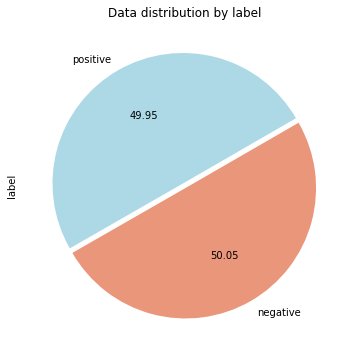

In [8]:
temp1 = train_data.label.value_counts(ascending=True)
plt.figure(figsize=(6,6))
temp1.plot(kind='pie', labels=["positive","negative"], autopct='%.2f', explode=(.02,.02), colors = ['lightblue','darksalmon'], startangle = 30)
plt.title("Data distribution by label")

### Data Cleaning

In [9]:
import re
import nltk as nlp

def preprocessor(xa):
    # Remove all the special characters
    xa = re.sub('[\W]+',' ',xa)
    # remove html tag
    xa = re.sub("<[^>]*>"," ",xa)
    # remove emoji
    xa = re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)',' ',xa)
    # remove all single characters
    xa = re.sub(r'\s+[a-zA-Z]\s+', ' ', xa)
    # Remove single characters from the start
    xa = re.sub(r'\^[a-zA-Z]\s+', ' ', xa)
    # Substituting multiple spaces with single space
    xa = re.sub(r'\s+', ' ', xa, flags=re.I)
    # Converting to Lowercase
    xa = xa.lower()
    # word split
    xa = nlp.word_tokenize(xa)
    # find root of separated word
    xa = [nlp.WordNetLemmatizer().lemmatize(i) for i in xa] 
    # join word split & return of cleaned text
    xa = " ".join(xa)
    return xa

data['text']= data['text'].apply(preprocessor)

In [10]:
data['text'][4]

'im die hard dad army fan and nothing will ever change that got all the tape dvd and audiobooks and every time watch listen to them it brand new br br the film the film is re run of certain episode man and the hour enemy within the gate battle school and numerous others with different edge introduction of new general instead of captain square wa brilliant move especially when he wouldn cash the cheque something that is rarely done now br br it follows through the early year of getting equipment and uniform starting up and training all in all it great film for boring sunday afternoon br br two draw back one is the german bogus dodgy accent come one german cant pronounced the letter like u and two the casting of liz frazer instead of the familiar janet davis like liz in other film like the carry ons but she doesn carry it correctly in this and janet davis would have been the better choice'

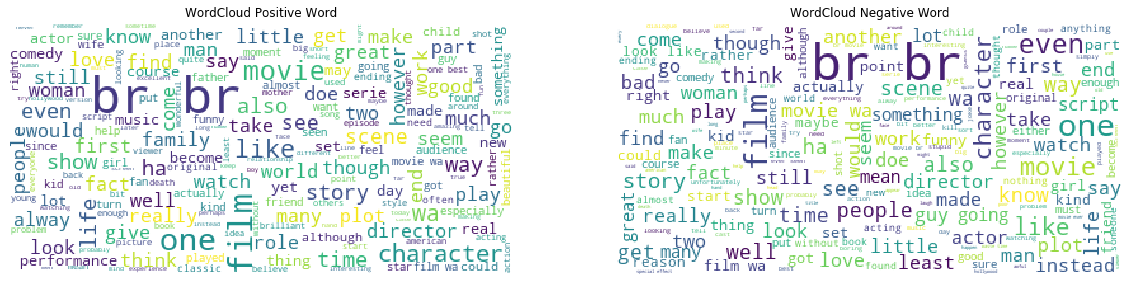

In [11]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

positive_word = data[data['label'] == 1]
positive_word = positive_word['text']

negative_word = data[data['label'] == 0]
negative_word = negative_word['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),background_color=color,max_font_size=40).generate(cleaned_word)
    plt.imshow(wordcloud)
    plt.axis("off")
    
plt.figure(figsize=(20,10))
plt.subplot(121)   
plt.title('WordCloud Positive Word')
wordcloud_draw(positive_word)

plt.subplot(122)
plt.title('WordCloud Negative Word')
wordcloud_draw(negative_word)
plt.show()

### Representing Text in Numeric Form

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

tfidf = TfidfVectorizer(lowercase=False, max_features=2500, stop_words=stopwords.words('english'))

In [13]:
Y = data['label'].values
X = tfidf.fit_transform(data['text'])

### Dividing Data into Training and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=36000)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(36000, 2500)
(36000,)
(9000, 2500)
(9000,)


### Training the Model, Making Predictions and Evaluating the Model

In [15]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression().fit(X_train,Y_train)

from sklearn.model_selection import cross_val_score
logr_acc_cv = cross_val_score(logr,X_test,Y_test,scoring='accuracy', cv=5)*100
logr_acc_cv1 = logr_acc_cv.mean()
print('Logistic Regression accuracy after cross validation',logr_acc_cv1,'%')

Logistic Regression accuracy after cross validation 86.27777777777777 %


In [16]:
from sklearn.metrics import classification_report
print('Classification report Logistic Regression:\n',classification_report(Y_test,logr.predict(X_test)))

Classification report Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4456
           1       0.87      0.89      0.88      4544

    accuracy                           0.88      9000
   macro avg       0.88      0.88      0.88      9000
weighted avg       0.88      0.88      0.88      9000



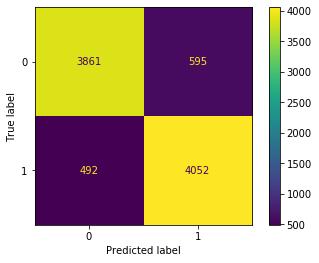

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logr,X_test,Y_test,values_format='0.0f')
plt.show()

## 3. Negative Feedback Analysis

In [54]:
negatif = data[data['label']==0].reset_index(drop=True)
negatif

,text,label
0,i grew up 1965 watching and loving the thunderbird all my mate at school watched we played thunderbird before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from 5 became an art form took my child to see the movie hoping they would get glimpse of what loved a child how bitterly disappointing the only high point wa the snappy them...,0
1,when put this movie in my dvd player and sat down with coke and some chip had some expectation wa hoping that this movie would contain some of the strong point of the first movie awsome animation good flowing story excellent voice cast funny comedy and kick as soundtrack but to my disappointment not any of this is to be found in atlantis milo return had read some review first might not have be...,0
2,why do people who do not know what particular time in the past wa like feel the need to try to define that time for others replace woodstock with the civil war and the apollo moon landing with the titanic sinking and you ve got a realistic flick a this formulaic soap opera populated entirely by low life trash is this what kid who were too young to be allowed to go to woodstock and who failed g...,0
3,even though have great interest in biblical movie wa bored to death every minute of the movie everything is bad the movie is too long the acting is most of the time joke and the script is horrible did not get the point in mixing the story about abraham and noah together so if you value your time and sanity stay away from this horror,0
4,a terrible movie a everyone ha said what made me laugh wa the cameo appearance by scott mcnealy giving an award to one of the murdered programmer in front of wall of sun logo mcnealy is the ceo of sun microsystem company that practically defines itself by it hatred of microsoft they have been instrumental in filing antitrust complaint against microsoft so were they silly enough to think this b...,0
...,...,...
22509,i had high expectation following my beautiful laundrette bend it like beckham and le so east is east the history of british asian fitting into their adopted home ha had many good run on the big screen a well a number of excellent tv and radio series goodness gracious me etc this one fall flat inspite of good start it rapidly went down hill br br ultimately this wa horribly typical bbc effort c...,0
22510,this one is just like the 6th movie the movie is really bad it offer nothing in the death department the one liner are bad and are something that shouldn be in no movie freddy come off a happy child in the whole movie lisa wilcox is still the only thing that make this one worth while the character are extremely underdeveloped all in all better than the 6th one but still one the worst movie of ...,0
22511,nbc should be ashamed wouldn allow my child to see this definitely would tell my church to stay away this movie is proof a to why nbc ha always been 3rd rate network the producer actor and writer should get on their knee and beg god forgiveness for making this work of fiction there were no pirate noah wife didn parade around on the deck of the ark the ark had no deck lot wasn even born when th...,0
22512,this movie is clumsy mishmash of various ghost story and suspense thriller convention none of them fully realized and all of them rather irritating the script wa perfunctory the acting ditto the scary fx were mostly laughable except for one exquisite seat jumper moment that scared me even though saw it coming mile off now explain to me someone why you would need ghost and black magic and arcan...,0


In [55]:
import nltk as nlp
from nltk.corpus import stopwords

splitMessages = []
for message in negatif["text"]:
    message = nlp.word_tokenize(message)
    message = [w for w in message if not w in set(stopwords.words("english"))]
    message = " ".join(message)
    splitMessages.append(message)

negatif["text"] = splitMessages
negatif.head()

,text,label
0,grew 1965 watching loving thunderbird mate school watched played thunderbird school lunch school wanted virgil scott one wanted alan counting 5 became art form took child see movie hoping would get glimpse loved child bitterly disappointing high point wa snappy theme tune could compare original score thunderbird thankfully early saturday morning one television channel still play rerun series g...,0
1,put movie dvd player sat coke chip expectation wa hoping movie would contain strong point first movie awsome animation good flowing story excellent voice cast funny comedy kick soundtrack disappointment found atlantis milo return read review first might let following paragraph directed seen first movie enjoyed primarily point mentioned br br first scene appears shock picked atlantis milo retur...,0
2,people know particular time past wa like feel need try define time others replace woodstock civil war apollo moon landing titanic sinking got realistic flick formulaic soap opera populated entirely low life trash kid young allowed go woodstock failed grade school composition show old meany put movie prove know nuttin topic still make money yeah already know one thing watching film wa give litt...,0
3,even though great interest biblical movie wa bored death every minute movie everything bad movie long acting time joke script horrible get point mixing story abraham noah together value time sanity stay away horror,0
4,terrible movie everyone ha said made laugh wa cameo appearance scott mcnealy giving award one murdered programmer front wall sun logo mcnealy ceo sun microsystem company practically defines hatred microsoft instrumental filing antitrust complaint microsoft silly enough think bad movie would add fuel fire br br public record see sun involvement clearly maker movie know scott mcnealy interesting...,0


In [56]:
coba_negatif = negatif['text']
coba_negatif

0        grew 1965 watching loving thunderbird mate school watched played thunderbird school lunch school wanted virgil scott one wanted alan counting 5 became art form took child see movie hoping would get glimpse loved child bitterly disappointing high point wa snappy theme tune could compare original score thunderbird thankfully early saturday morning one television channel still play rerun series g...
1        put movie dvd player sat coke chip expectation wa hoping movie would contain strong point first movie awsome animation good flowing story excellent voice cast funny comedy kick soundtrack disappointment found atlantis milo return read review first might let following paragraph directed seen first movie enjoyed primarily point mentioned br br first scene appears shock picked atlantis milo retur...
2        people know particular time past wa like feel need try define time others replace woodstock civil war apollo moon landing titanic sinking got realistic flick formulaic soap 

In [57]:
print("banyak dokumen hasil :", len(coba_negatif))

banyak dokumen hasil : 22514


In [58]:
# get all word
import nltk as nlp
negatif_all_input = coba_negatif

all_tokens = []
for i in negatif_all_input:
    word_tokens = nlp.word_tokenize(i)
    all_tokens.extend(word_tokens)
all_tokens[:26]

['grew',
 '1965',
 'watching',
 'loving',
 'thunderbird',
 'mate',
 'school',
 'watched',
 'played',
 'thunderbird',
 'school',
 'lunch',
 'school',
 'wanted',
 'virgil',
 'scott',
 'one',
 'wanted',
 'alan',
 'counting',
 '5',
 'became',
 'art',
 'form',
 'took',
 'child']

In [59]:
from collections import Counter
print("semua kata dalam token : ", len(all_tokens))

input_doc = all_tokens
counts = Counter(input_doc)

word = counts.keys()
count_word = counts.values()

df_coba = pd.DataFrame(count_word, index = word)
df_coba = df_coba.sort_values(0,ascending=False)

semua kata dalam token :  2811147


In [60]:
# calculate top 25 negative word from all data        
df_word_neg = df_coba.copy()
df_word_neg.head(25)

,0
br,93515
movie,52608
wa,47140
film,39540
one,24464
like,20738
ha,13824
even,13792
time,13686
good,13407


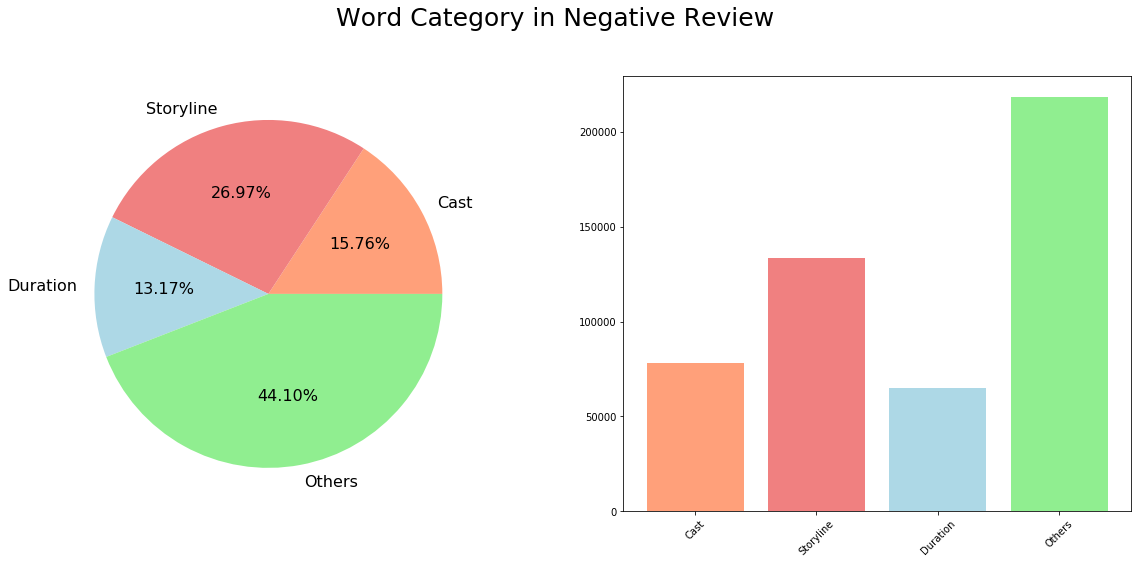

In [85]:
# word category in negative review
heights = df_word_neg[0][0:26]
tick_labels = df_word_neg.index.tolist()[0:26]

cast_term = ['like', 'even', 'good', 'character','people','thing']
storyline_term = ['movie', 'film', 'bad','scene','story','plot']
duration_term = ['time', 'one','see','made','much']
general = ['br','wa','ha','would','get','make','really','could']

counts_term = [0,0,0,0]
for i in tick_labels:
    n = heights[tick_labels.index(i)]
    if i in cast_term:
        counts_term[0]+= n
    elif i in storyline_term:
        counts_term[1]+=n
    elif i in duration_term:
        counts_term[2]+= n
    else:
        counts_term[3]+=n
            
fig = plt.figure(figsize=(20,8))
plt.suptitle("Word Category in Negative Review", fontsize='25', color='black', va='center')

plt.subplot(121)
plt.pie(counts_term, labels=['Cast', 'Storyline','Duration','Others'], 
        autopct='%1.2f%%',colors=['lightsalmon','lightcoral','lightblue','lightgreen'], textprops={'fontsize': 16})

plt.subplot(122)
label = ['Cast', 'Storyline', 'Duration', 'Others']
plt.bar(label,counts_term,color=['lightsalmon','lightcoral','lightblue','lightgreen'])
plt.xticks(rotation='45')
plt.show()

## 4. Final Summary

#### From above data analysis we can conclude that:

- The data has equal distribution, both positive and negative review has 50% of total distributions.
- Positive words that are highlighted are love, great, perfect, good, beautiful, nice, excellent.
- Negative words that are highlighted are awful, waste, problem, stupid, horrible, bad, poor.
- The top three negative feedback review talks about the storyline, movie cast, and time duration cause others category means nothing.
- We know that every person has their type of movie preferences, so it would be really good transforming data insight to the next levels.
- The machine learning model can predict 86% accuracy that also implemented evaluation metrics such as classification reports and confusion matrix.

#### Statistical interpretation

Statistical algorithms use mathematics to train machine learning models. However, mathematics only works with numbers. To make statistical algorithms work with text, we first have to convert text to numbers. To do so, three main approaches exist i.e. Bag of Words, TF-IDF, and Word2Vec. In this section, I'm using the bag of words and the TF-IDF scheme.

#### Insights gained from sentiment analysis in another case, including:

- Grouping products that have many negative reviews and see the impact on the brand in overall/specified item number of sales.
- Give complete direction for customer service to handle negative reviews in social media and brand monitoring in the right manner.
- Targeting market research by oversee their review and send recommendation products based on their like product.

I would like to close by mentioning that there is always scope for improvement, I also open to any other constructive comment that will be helped.